## Load Dataset

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn
from sklearn import preprocessing

In [62]:
csv_path = "/Users/saifmohammed/Desktop/DiabetIQ/ML/Test/Copy Dataset/Diabetes_Final_Data_V20.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [64]:
df.shape

(5437, 15)

In [66]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [68]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


## Outliers

<Axes: xlabel='age'>

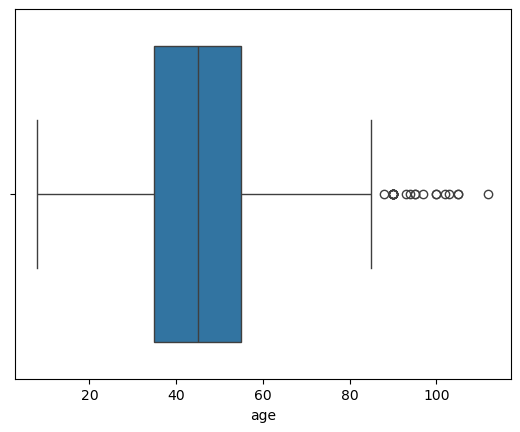

In [71]:
sns.boxplot(x=df['age'])

In [72]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [75]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [77]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

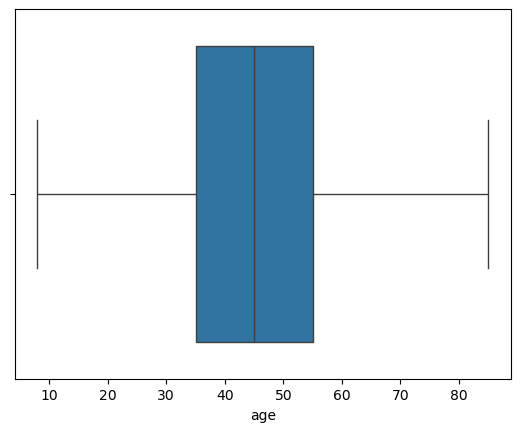

In [79]:
df = non_outliers
sns.boxplot(x=df['age'])

In [81]:
df['diabetic'].value_counts()

diabetic
No     5070
Yes     344
Name: count, dtype: int64

In [83]:
df['gender'].value_counts()

gender
Female    3849
Male      1565
Name: count, dtype: int64

## Categorial Data Handling

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   object 
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   objec

In [88]:
# Ensure you're modifying the original dataframe
df = df.copy()

df['gender'] = df['gender'].astype('category')
df['diabetic'] = df['diabetic'].astype('category')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5414 non-null   int64   
 1   gender                  5414 non-null   category
 2   pulse_rate              5414 non-null   int64   
 3   systolic_bp             5414 non-null   int64   
 4   diastolic_bp            5414 non-null   int64   
 5   glucose                 5414 non-null   float64 
 6   height                  5414 non-null   float64 
 7   weight                  5414 non-null   float64 
 8   bmi                     5414 non-null   float64 
 9   family_diabetes         5414 non-null   int64   
 10  hypertensive            5414 non-null   int64   
 11  family_hypertension     5414 non-null   int64   
 12  cardiovascular_disease  5414 non-null   int64   
 13  stroke                  5414 non-null   int64   
 14  diabetic                5414 

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['diabetic'] = le.fit_transform(df['diabetic'])

In [94]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
839,35,1,68,111,63,6.64,1.57,52.3,21.09,0,0,0,0,0,0
4534,40,1,65,121,79,4.71,1.63,60.0,22.71,0,0,0,0,0,0
2679,35,0,84,129,79,14.80,1.52,52.0,22.39,0,0,0,0,0,0
2339,50,0,68,125,78,5.88,1.57,56.4,22.74,0,0,0,0,0,0
2577,70,1,85,129,69,4.55,1.68,56.8,20.21,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,50,0,70,146,80,8.95,1.52,47.0,20.24,0,0,0,0,0,0
4090,50,1,70,154,86,16.99,1.60,64.4,25.15,0,1,0,0,0,1
1679,40,0,80,121,85,5.45,1.57,65.0,26.21,0,0,0,1,0,0
544,65,1,75,118,94,5.99,1.63,50.0,18.92,0,0,0,0,0,0


In [96]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,839,35,1,68,111,63,6.64,1.57,52.3,21.09,0,0,0,0,0,0
1,4534,40,1,65,121,79,4.71,1.63,60.0,22.71,0,0,0,0,0,0
2,2679,35,0,84,129,79,14.80,1.52,52.0,22.39,0,0,0,0,0,0
3,2339,50,0,68,125,78,5.88,1.57,56.4,22.74,0,0,0,0,0,0
4,2577,70,1,85,129,69,4.55,1.68,56.8,20.21,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,3254,50,0,70,146,80,8.95,1.52,47.0,20.24,0,0,0,0,0,0
5410,4090,50,1,70,154,86,16.99,1.60,64.4,25.15,0,1,0,0,0,1
5411,1679,40,0,80,121,85,5.45,1.57,65.0,26.21,0,0,0,1,0,0
5412,544,65,1,75,118,94,5.99,1.63,50.0,18.92,0,0,0,0,0,0


In [98]:
X = df.drop('diabetic', axis=1)
Y = df['diabetic']

In [100]:
x.columns

Index(['index', 'age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp',
       'glucose', 'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object')

In [102]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5409    0
5410    0
5411    0
5412    0
5413    0
Name: diabetic, Length: 5414, dtype: int64

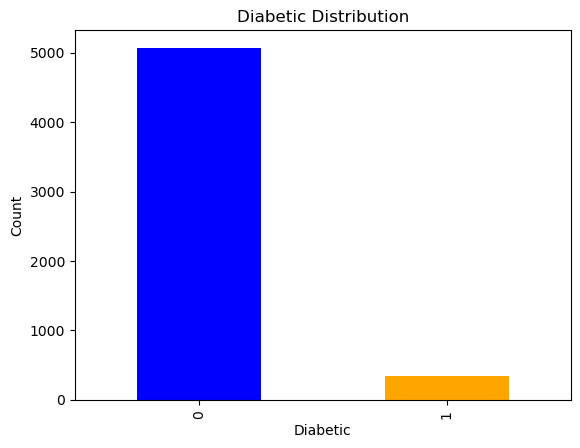

In [104]:
y.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [106]:
class_counts = y.value_counts()

# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    93.646103
1     6.353897
Name: count, dtype: float64

## Train Test  Split

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

In [111]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X = ss.fit_transform(X)

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train))

Class distribution after SMOTE: Counter({0: 4042, 1: 2829})


In [115]:
X_train

array([[ 1.70943565, -0.45686466,  1.57705978, ..., -0.20026399,
        -0.11445268, -0.06460208],
       [ 0.10274504, -0.74311144, -0.63409137, ..., -0.20026399,
        -0.11445268, -0.06460208],
       [-0.27678817, -1.10091992, -0.63409137, ..., -0.20026399,
        -0.11445268, -0.06460208],
       ...,
       [-0.95654663,  0.83935236, -0.63409137, ..., -0.20026399,
        -0.11445268, -0.06460208],
       [-0.60182   ,  0.4740617 , -0.63409137, ..., -0.20026399,
        -0.11445268, -0.06460208],
       [ 0.11993174,  0.75668038, -0.63409137, ..., -0.20026399,
        -0.11445268, -0.06460208]])

In [117]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
6866    1
6867    1
6868    1
6869    1
6870    1
Name: diabetic, Length: 6871, dtype: int64

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 

## Decision Tree

In [122]:
from sklearn import tree

# Train the decision tree classifier
dt_clf = tree.DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [130]:
dt_error = mean_squared_error(y_test, dt_pred)
print("The Mean Squared Error For Decision Tree Regression is: {}".format(dt_error))

The Mean Squared Error For Decision Tree Regression is: 0.1172668513388735


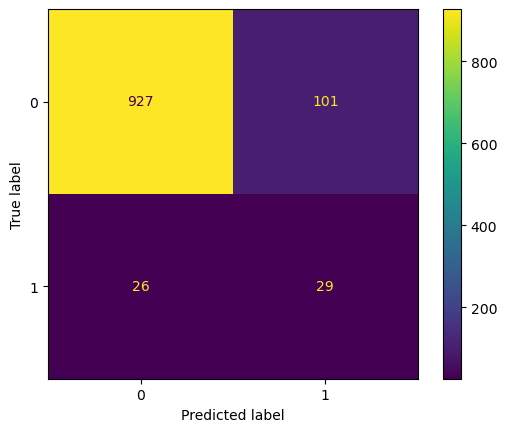

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

dt_pred = dt_clf.predict(X_test)
cm = confusion_matrix(y_test, dt_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [134]:
dtscore = dt_clf.score(X_test,y_test)
dt_cm = confusion_matrix(y_test,dt_pred)
dt_cr = classification_report(y_test,dt_pred)
print('Decision Tree results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(dtscore *100))
print('\n')
print('Confusion Matrix')
print(dt_cm)
print('\n')
print('Classification report')
print(dt_cr)

Decision Tree results
---------------------------
Accuracy is 88.27%


Confusion Matrix
[[927 101]
 [ 26  29]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1028
           1       0.22      0.53      0.31        55

    accuracy                           0.88      1083
   macro avg       0.60      0.71      0.62      1083
weighted avg       0.93      0.88      0.90      1083



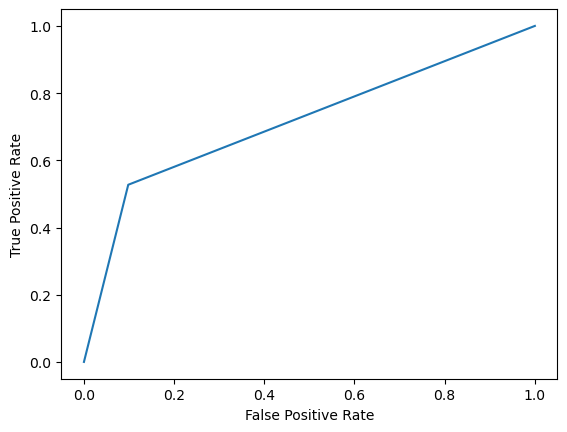

In [136]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [138]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.71


In [150]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 50, 100], 
    'min_samples_split': [2, 5, 10, 15, 20] 
}

# Initialize the Decision Tree Classifier
dt_clf = tree.DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             verbose=2)

In [152]:
print(grid_search.best_params_)
best_dt_clf = grid_search.best_estimator_

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2}


In [154]:
bestdtscore = best_dt_clf.score(X_test,y_test)
dt_cm = confusion_matrix(y_test,dt_pred)
dt_cr = classification_report(y_test,dt_pred)
print('Decision Tree results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(bestdtscore *100))
print('\n')
print('Confusion Matrix')
print(dt_cm)
print('\n')
print('Classification report')
print(dt_cr)

Decision Tree results
---------------------------
Accuracy is 87.90%


Confusion Matrix
[[927 101]
 [ 26  29]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1028
           1       0.22      0.53      0.31        55

    accuracy                           0.88      1083
   macro avg       0.60      0.71      0.62      1083
weighted avg       0.93      0.88      0.90      1083



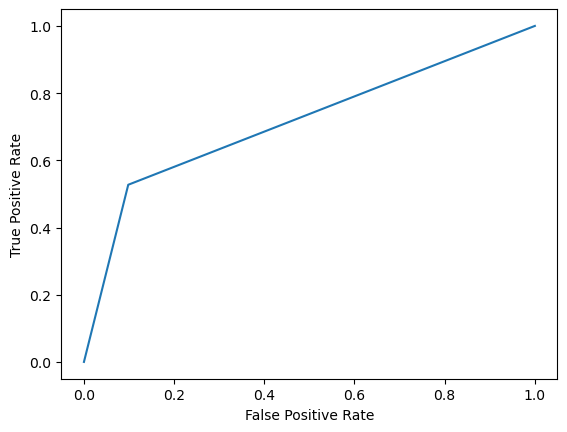

In [156]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [148]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.71


## Random Forest

In [163]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [167]:
rf_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, rf_pred)

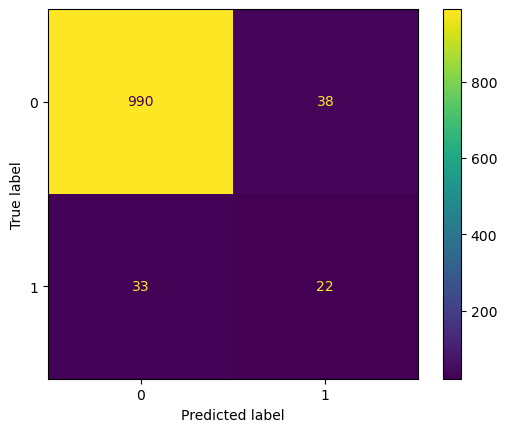

In [169]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [171]:
rfscore = rf_clf.score(X_test,y_test)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cr = classification_report(y_test,rf_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(rf_cm)
print('\n')
print('Classification report')
print(rf_cr) 

Random Forest results
---------------------------
Accuracy is 93.44%


Confusion Matrix
[[990  38]
 [ 33  22]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1028
           1       0.37      0.40      0.38        55

    accuracy                           0.93      1083
   macro avg       0.67      0.68      0.67      1083
weighted avg       0.94      0.93      0.94      1083



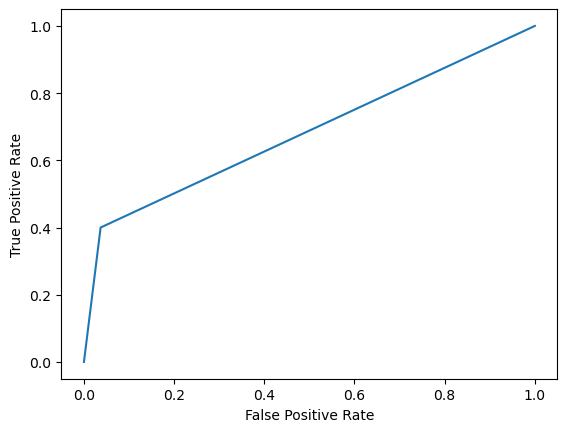

In [173]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [175]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.68


In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             verbose=2)

In [179]:
print(grid_search.best_params_)
best_rf_clf = grid_search.best_estimator_

{'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 5}


In [181]:
rfscore = best_rf_clf.score(X_test,y_test)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cr = classification_report(y_test,rf_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(rf_cm)
print('\n')
print('Classification report')
print(rf_cr) 

Random Forest results
---------------------------
Accuracy is 92.15%


Confusion Matrix
[[990  38]
 [ 33  22]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1028
           1       0.37      0.40      0.38        55

    accuracy                           0.93      1083
   macro avg       0.67      0.68      0.67      1083
weighted avg       0.94      0.93      0.94      1083



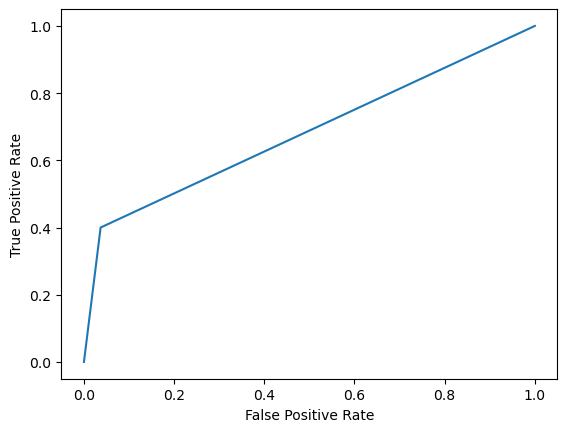

In [183]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [185]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.68


## Logistic Regression 

In [190]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model with resampled data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [192]:
log_reg_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, log_reg_pred)

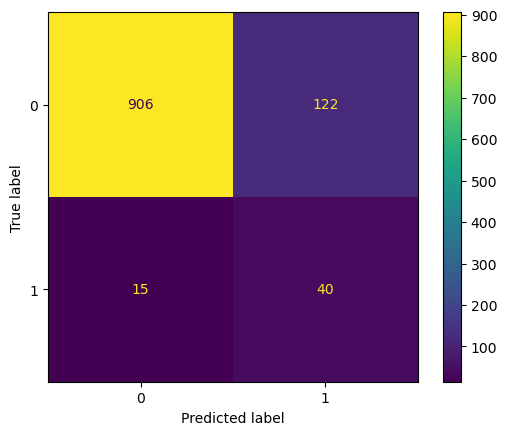

In [194]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [198]:
logregscore = log_reg.score(X_test,y_test)
lin_cm = confusion_matrix(y_test,log_reg_pred)
lin_cr = classification_report(y_test,log_reg_pred)
print('Logistic Regression results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(logregscore *100))
print('\n')
print('Confusion Matrix')
print(lin_cm)
print('\n')
print('Classification report')
print(lin_cr)                    

Logistic Regression results
---------------------------
Accuracy is 87.35%


Confusion Matrix
[[906 122]
 [ 15  40]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1028
           1       0.25      0.73      0.37        55

    accuracy                           0.87      1083
   macro avg       0.62      0.80      0.65      1083
weighted avg       0.95      0.87      0.90      1083



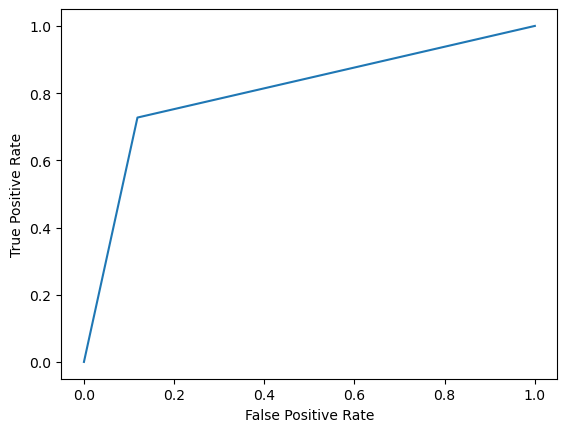

In [200]:
fpr, tpr, _ = roc_curve(y_test, log_reg_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [202]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.80


In [204]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Removed 'elasticnet' and 'None'
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'],  # 'saga' works with L1 & L2
}

log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid, 
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2   # Display progress
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [206]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [210]:
bestlogregscore = best_log_reg.score(X_test,y_test)
log_reg_cm = confusion_matrix(y_test,log_reg_pred)
log_reg_cr = classification_report(y_test,log_reg_pred)
print('Naive Bayes classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(bestlogregscore *100))
print('\n')
print('Confusion Matrix')
print(log_reg_cm)
print('\n')
print('Classification report')
print(log_reg_cr) 

Naive Bayes classifier results
---------------------------
Accuracy is 87.35%


Confusion Matrix
[[906 122]
 [ 15  40]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1028
           1       0.25      0.73      0.37        55

    accuracy                           0.87      1083
   macro avg       0.62      0.80      0.65      1083
weighted avg       0.95      0.87      0.90      1083



## SVM

In [259]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model=SVC(kernel='linear',random_state=0)
svm.fit(X_train, y_train)

SVC()

In [261]:
svm_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, svm_pred)

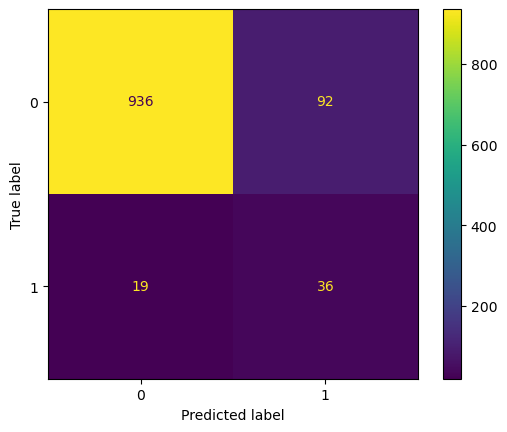

In [263]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [265]:
svmscore = svm.score(X_test,y_test)
svm_cm = confusion_matrix(y_test,svm_pred)
svm_cr = classification_report(y_test,svm_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(svm_cm)
print('\n')
print('Classification report')
print(svm_cr) 

Random Forest results
---------------------------
Accuracy is 92.15%


Confusion Matrix
[[936  92]
 [ 19  36]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1028
           1       0.28      0.65      0.39        55

    accuracy                           0.90      1083
   macro avg       0.63      0.78      0.67      1083
weighted avg       0.94      0.90      0.92      1083



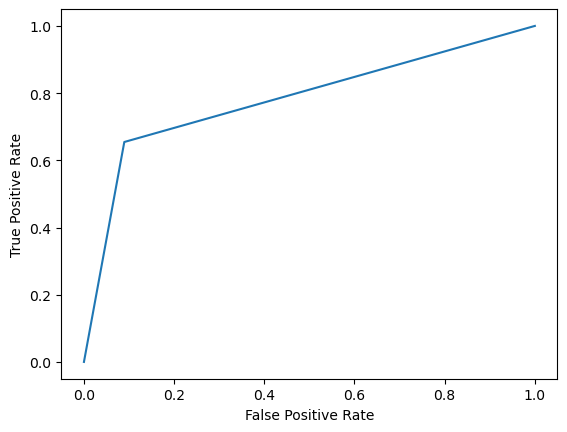

In [267]:
fpr, tpr, _ = roc_curve(y_test, svm_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [269]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.78


## KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [231]:
knn_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_pred)

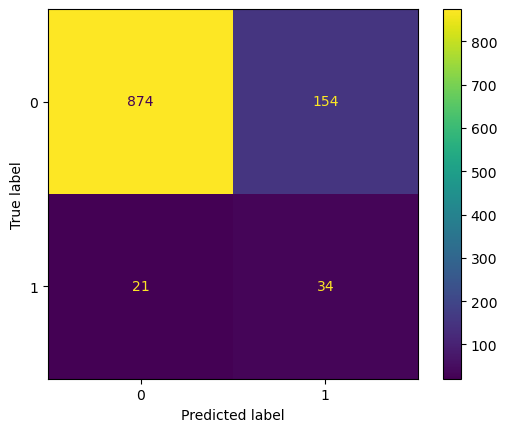

In [233]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [237]:
knnscore = knn.score(X_test,y_test)
knn_cm = confusion_matrix(y_test,knn_pred)
knn_cr = classification_report(y_test,knn_pred)
print('K Nearest Neighbour results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(knnscore *100))
print('\n')
print('Confusion Matrix')
print(knn_cm)
print('\n')
print('Classification report')
print(knn_cr) 

K Nearest Neighbour results
---------------------------
Accuracy is 83.84%


Confusion Matrix
[[874 154]
 [ 21  34]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1028
           1       0.18      0.62      0.28        55

    accuracy                           0.84      1083
   macro avg       0.58      0.73      0.59      1083
weighted avg       0.94      0.84      0.88      1083



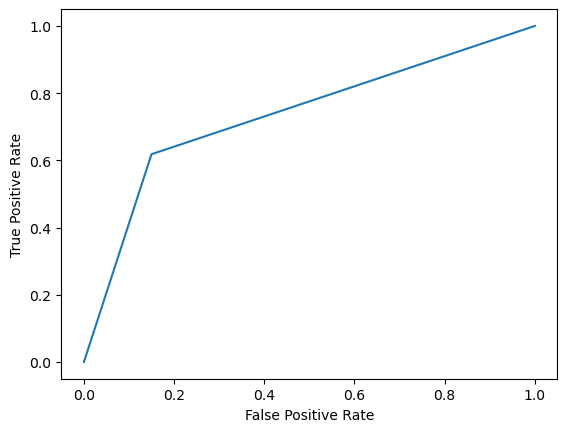

In [239]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [241]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.73


## Gradient Boosting Classifier

In [247]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

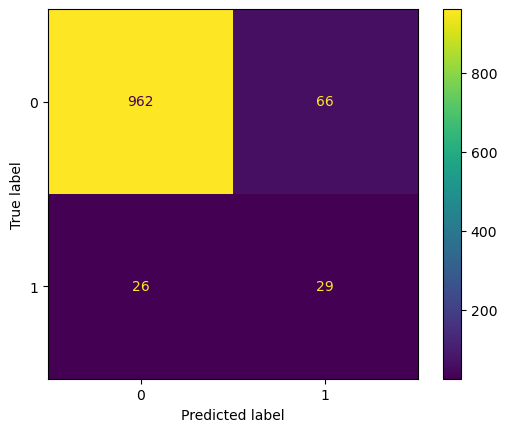

In [251]:
cm = confusion_matrix(y_test, gb_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [253]:
gbscore = gb_model.score(X_test,y_test)
gb_cm = confusion_matrix(y_test,gb_pred)
gb_cr = classification_report(y_test,gb_pred)
print('Gradient Boosting Classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(gbscore *100))
print('\n')
print('Confusion Matrix')
print(gb_cm)
print('\n')
print('Classification report')
print(gb_cr) 

Gradient Boosting Classifier results
---------------------------
Accuracy is 91.51%


Confusion Matrix
[[962  66]
 [ 26  29]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1028
           1       0.31      0.53      0.39        55

    accuracy                           0.92      1083
   macro avg       0.64      0.73      0.67      1083
weighted avg       0.94      0.92      0.93      1083



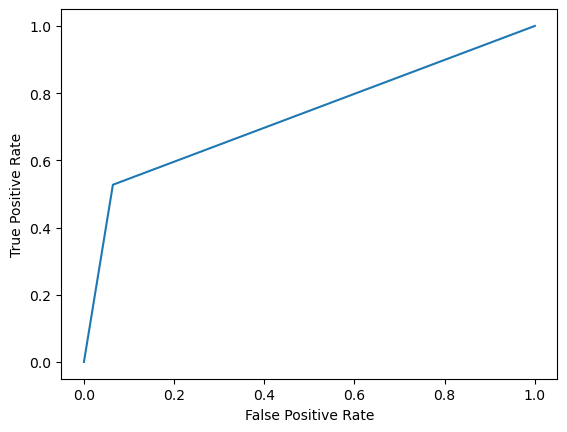

In [255]:
fpr, tpr, _ = roc_curve(y_test, gb_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [257]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.73


## XGBoost

In [272]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

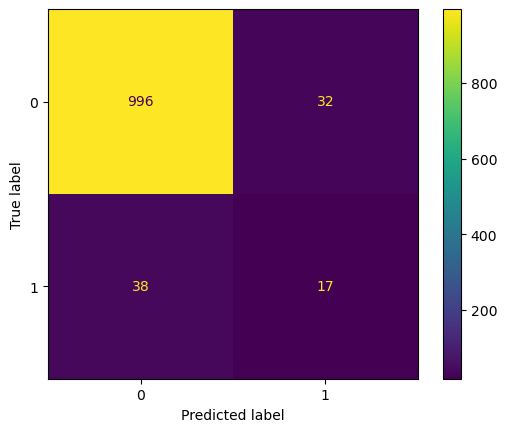

In [278]:
xgb_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [280]:
xgbscore = xgb_clf.score(X_test,y_test)
xgb_cm = confusion_matrix(y_test,xgb_pred)
xgb_cr = classification_report(y_test,xgb_pred)
print('Gradient Boosting Classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(xgbscore *100))
print('\n')
print('Confusion Matrix')
print(xgb_cm)
print('\n')
print('Classification report')
print(xgb_cr) 

Gradient Boosting Classifier results
---------------------------
Accuracy is 93.54%


Confusion Matrix
[[996  32]
 [ 38  17]]


Classification report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1028
           1       0.35      0.31      0.33        55

    accuracy                           0.94      1083
   macro avg       0.66      0.64      0.65      1083
weighted avg       0.93      0.94      0.93      1083



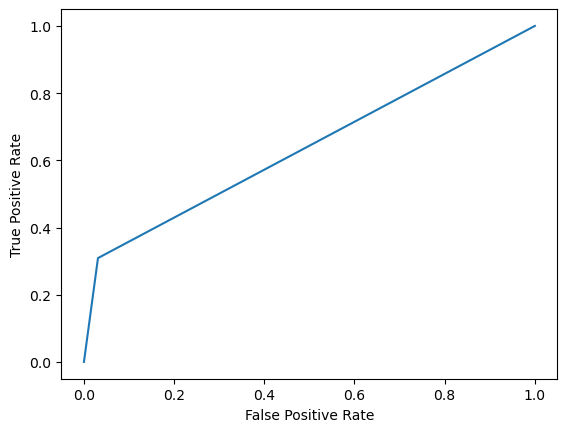

In [282]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [284]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.64


## Naive Bayes

In [287]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [289]:
nbscore = nb_model.score(X_test,y_test)
nb_cm = confusion_matrix(y_test,nb_pred)
nb_cr = classification_report(y_test,nb_pred)
print('Naive Bayes classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(nbscore *100))
print('\n')
print('Confusion Matrix')
print(nb_cm)
print('\n')
print('Classification report')
print(nb_cr) 

Naive Bayes classifier results
---------------------------
Accuracy is 87.63%


Confusion Matrix
[[909 119]
 [ 15  40]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1028
           1       0.25      0.73      0.37        55

    accuracy                           0.88      1083
   macro avg       0.62      0.81      0.65      1083
weighted avg       0.95      0.88      0.90      1083



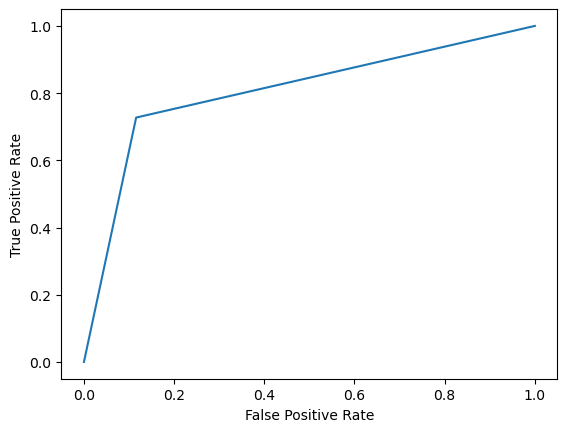

In [291]:
fpr, tpr, _ = roc_curve(y_test, nb_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [293]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.81


## Adaboost

In [302]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


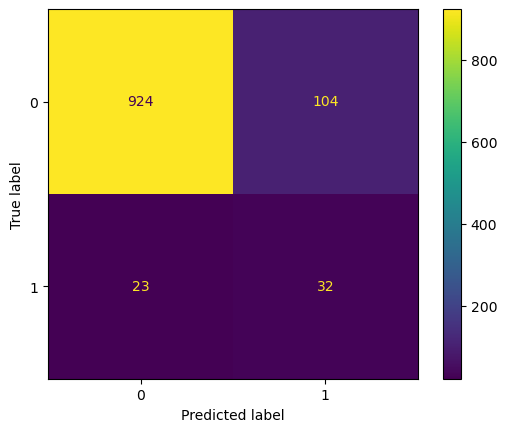

In [304]:
cm = confusion_matrix(y_test, ada_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [306]:
adascore = ada_model.score(X_test,y_test)
ada_cm = confusion_matrix(y_test,ada_pred)
ada_cr = classification_report(y_test,ada_pred)
print('Naive Bayes classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(adascore *100))
print('\n')
print('Confusion Matrix')
print(ada_cm)
print('\n')
print('Classification report')
print(ada_cr) 

Naive Bayes classifier results
---------------------------
Accuracy is 88.27%


Confusion Matrix
[[924 104]
 [ 23  32]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1028
           1       0.24      0.58      0.34        55

    accuracy                           0.88      1083
   macro avg       0.61      0.74      0.64      1083
weighted avg       0.94      0.88      0.91      1083



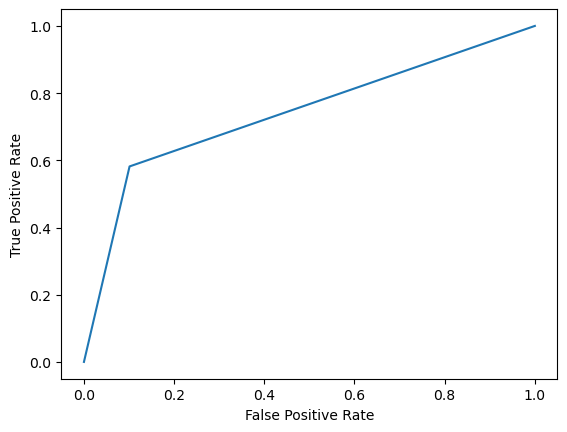

In [308]:
fpr, tpr, _ = roc_curve(y_test, ada_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [310]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.74
